# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

%matplotlib inline

In [2]:
uber_mentions_03 = pd.read_csv("../data/uber_mentions_data_03_01.csv")
uber_mentions_05 = pd.read_csv("../data/uber_mentions_data_05.csv")
uber_mentions_07 = pd.read_csv("../data/uber_mentions_data_07.csv")

In [3]:
bolt_mentions_03 = pd.read_csv("../data/taxify_mentions_data_03.csv")
bolt_mentions_05 = pd.read_csv("../data/taxify_mentions_data_05.csv")
bolt_mentions_07 = pd.read_csv("../data/taxify_mentions_data_07.csv")

In [2]:
plentywaka_03 = pd.read_csv("../data/plentywaka_data_03.csv")
plentywaka_05 = pd.read_csv("../data/plentywaka_data_05.csv")
plentywaka_data = pd.read_csv("../data/plentywaka_data.csv")
plentywaka_data_1 = pd.read_csv("../data/plentywaka_data_1.csv")

In [3]:
staffbusng_03 = pd.read_csv("../data/staffbus_mentions_data_03.csv")
staffbusng_05 = pd.read_csv("../data/staffbus_mentions_data_05.csv")
staffbusng_07 = pd.read_csv("../data/staffbus_mentions_data_07.csv")

In [4]:
staffbusng_05 = staffbusng_05.loc[staffbusng_05.truncated.eq(False)]

In [5]:
staffbusng_05.rename(columns={"text":"full_text"}, inplace=True)

In [7]:
staffbusng = pd.concat([staffbusng_03, staffbusng_05, staffbusng_07], axis=0, join="inner")

In [6]:
plentywaka = pd.concat([plentywaka_03, plentywaka_05], axis=0, join="inner")

In [8]:
plentywaka.drop_duplicates(inplace=True)

In [9]:
staffbusng.drop_duplicates(inplace=True)

In [10]:
plentywaka.shape

(559, 30)

In [11]:
staffbusng.shape

(3039, 24)

In [12]:
plentywaka_data_1 = plentywaka_data_1.loc[plentywaka_data_1.truncated.eq(False)]

In [13]:
plentywaka.rename(columns={"full_text":"text"}, inplace=True)

In [14]:
plentywaka_data_complete = pd.concat([plentywaka, plentywaka_data_1], axis=0, join="inner")

In [15]:
plentywaka_data_complete.drop_duplicates(inplace=True)

In [16]:
plentywaka_data_complete.shape

(1073, 24)

In [4]:
from collections import defaultdict

def mentions_checker(datasets, word_list):
    results = defaultdict(int)
    for dataset in datasets:
        for word in word_list:
            results[word] += dataset.full_text.str.contains(word).sum()
    return results.items()

In [5]:
for dataset in [uber_mentions_03, uber_mentions_05, uber_mentions_07,
                bolt_mentions_03, bolt_mentions_05, bolt_mentions_07]:
    dataset["created_at"] = dataset.created_at.apply(pd.to_datetime)

In [6]:
uber_mentions_03.sort_values("created_at", inplace=True)
uber_mentions_05.sort_values("created_at", inplace=True)
uber_mentions_07.sort_values("created_at", inplace=True)
bolt_mentions_03.sort_values("created_at", inplace=True)
bolt_mentions_05.sort_values("created_at", inplace=True)
bolt_mentions_07.sort_values("created_at", inplace=True)

In [7]:
mentions_checker([bolt_mentions_03, bolt_mentions_05, bolt_mentions_05], ["fare", "surge", "price", "money", "card"])

dict_items([('fare', 30), ('surge', 40), ('price', 42), ('money', 86), ('card', 113)])

In [8]:
mentions_checker([uber_mentions_03, uber_mentions_05, uber_mentions_07], ["fare", "surge", "price", "money", "card"])

dict_items([('fare', 12), ('surge', 55), ('price', 16), ('money', 37), ('card', 41)])

In [17]:
#Custom function to lower case of text and clean some entities
def clean_text(x):
    x = x.lower()
    x = re.sub("&amp", '', x) #replace &amp tags
    x = re.sub(r'@[A-Z0-9a-z_:]+', '', x) # replaces username-tags
    x = re.sub('https?://[A-Za-z0-9./]+', '', x) #replaces URLs
    x = re.sub("[^a-zA-Z]", " ", x) #replaces hashtags
    x = re.sub("\n", "", x)
    x = re.sub("{}".format(re.escape(string.punctuation)), "", x)
    return x

In [10]:
uber_mentions_03.full_text = uber_mentions_03.full_text.apply(clean_text)
uber_mentions_05.full_text = uber_mentions_05.full_text.apply(clean_text)
uber_mentions_07.full_text = uber_mentions_07.full_text.apply(clean_text)

In [11]:
bolt_mentions_03.full_text = bolt_mentions_03.full_text.apply(clean_text)
bolt_mentions_05.full_text = bolt_mentions_05.full_text.apply(clean_text)
bolt_mentions_07.full_text = bolt_mentions_07.full_text.apply(clean_text)

In [18]:
plentywaka_data_complete.text = plentywaka_data_complete.text.apply(clean_text)

In [19]:
staffbusng.full_text = staffbusng.full_text.apply(clean_text)

In [12]:
def dataset_full_text_sampler(dataset, n):
    print(dataset.full_text.sample(n=n).to_dict())

In [13]:
dataset_full_text_sampler(bolt_mentions_03, 5)

{1155: '         i have never stopped for vio what s their job if i may ask ', 1494: 'rt     sorry about that  i hope it was solved amicably ', 702: '    imagine some just gets angry for no reason ', 1078: 'rt  hello    my wife gave birth to our new baby in one of your cabs  it would be nice if you join in the celebration ', 596: '  wild wadi  god safe my benefactor'}


In [106]:
plentywaka_data_complete.text.sample(n=5).to_dict()

{221: 'rt  this ban has taught me something o    yesterday i heard there s a bus app with ac and all just like uber for specific routes  ',
 323: 'rt  this ban has taught me something o    yesterday i heard there s a bus app with ac and all just like uber for specific routes  ',
 466: 'rt  this ban has taught me something o    yesterday i heard there s a bus app with ac and all just like uber for specific routes  ',
 711: ' i like this kind waka because people go plenty for road  it s a crusade walk lol',
 529: 'rt  this ban has taught me something o    yesterday i heard there s a bus app with ac and all just like uber for specific routes  '}

In [131]:
staffbusng.full_text.sample(n=5).to_dict()

{1311: ' please we can t wait  thank u',
 495: 'rt  join our daily bus rides from surulere yaba to victoria island admiralty   sign up on   ',
 264: 'rt  feeling distraught about tomorrow s commute to work    join convenient  comfortable and quick buses across lagos  sign up o ',
 676: 'rt  feeling distraught about tomorrow s commute to work    join convenient  comfortable and quick buses across lagos  sign up o ',
 822: 'rt  join our daily bus rides from surulere yaba to victoria island admiralty   sign up on   '}

In [20]:
from nltk.tokenize import word_tokenize

In [15]:
for dataset in [uber_mentions_03, uber_mentions_05, uber_mentions_07,
                bolt_mentions_03, bolt_mentions_05, bolt_mentions_07]:
    
    dataset["tokens"] = dataset.full_text.apply(word_tokenize)

In [21]:
plentywaka_data_complete["tokens"] = plentywaka_data_complete.text.apply(word_tokenize)

In [22]:
staffbusng["tokens"] = staffbusng.full_text.apply(word_tokenize)

In [23]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

other_stop_words = ["rt", "lagos", "ride", "n", "get", "please", "trip", "n", "hello", 
"ride", "trip", "get", "one", "would", "end", "bolt", "going", "uber"]

stop_words.update(other_stop_words)

In [17]:
for dataset in [uber_mentions_03, uber_mentions_05, uber_mentions_07,
                bolt_mentions_03, bolt_mentions_05, bolt_mentions_07]:
    
    dataset["tokens_wo_sw"] = dataset.tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [24]:
plentywaka_data_complete["tokens_wo_sw"] = plentywaka_data_complete.tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [25]:
staffbusng["tokens_wo_sw"] = staffbusng.tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [50]:
uber_dict = list()

#for dataset in [uber_mentions_03, uber_mentions_05, uber_mentions_07]:
for token in uber_data.tokens_wo_sw:
    uber_dict += token

In [48]:
bolt_dict = list()

#for dataset in [bolt_mentions_03, bolt_mentions_05, bolt_mentions_07]:
for token in bolt_data.tokens_wo_sw:
    bolt_dict += token

In [26]:
plentywaka_dict = list()


for token in plentywaka_data_complete.tokens_wo_sw:
    plentywaka_dict += token

In [27]:
staffbusng_dict = list()


for token in staffbusng.tokens_wo_sw:
    staffbusng_dict += token

In [28]:
from nltk.probability import FreqDist

In [51]:
freq_distr_uber = FreqDist(uber_dict)

print(freq_distr_uber.most_common(30))

[('uberboltstrike', 208), ('drivers', 207), ('monday', 207), ('commences', 196), ('sight', 196), ('ready', 194), ('driver', 163), ('vio', 67), ('people', 64), ('want', 62), ('make', 61), ('surge', 57), ('time', 52), ('dm', 51), ('go', 49), ('okada', 49), ('still', 45), ('airport', 45), ('guys', 44), ('nigeria', 44), ('card', 44), ('think', 42), ('leading', 42), ('keke', 40), ('thanks', 38), ('car', 38), ('know', 38), ('commit', 38), ('suicide', 38), ('lekki', 37)]


In [76]:
uber_data.full_text.str.contains("high | app | driver | drivers | cost | price | surge | fare | drivers | refund").sum() / len(uber_data)

0.25639300134589504

In [77]:
bolt_data.full_text.str.contains("high | app | driver | drivers | cost | price | surge | fare | drivers | refund").sum() / len(bolt_data)

0.24238026124818576

In [78]:
bolt_data.full_text.str.contains("uberboltstrike").sum() / len(bolt_data)

0.038461538461538464

In [79]:
uber_data.full_text.str.contains("uberboltstrike").sum() / len(uber_data)

0.13997308209959622

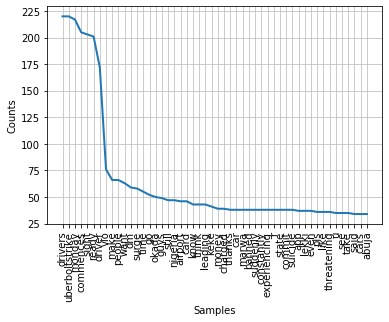

In [22]:
freq_distr_uber.plot(50, cumulative=False)

In [49]:
freq_distr_bolt = FreqDist(bolt_dict)

print(freq_distr_bolt.most_common(30))

[('wife', 604), ('driver', 600), ('baby', 520), ('join', 507), ('celebration', 501), ('birth', 500), ('gave', 498), ('new', 493), ('nice', 492), ('cabs', 492), ('drivers', 488), ('love', 198), ('go', 195), ('use', 184), ('pickup', 167), ('need', 167), ('time', 166), ('ready', 165), ('monday', 161), ('uberboltstrike', 159), ('like', 155), ('commences', 151), ('sight', 150), ('valentine', 141), ('screenshot', 141), ('people', 134), ('make', 131), ('know', 130), ('tell', 126), ('car', 123)]


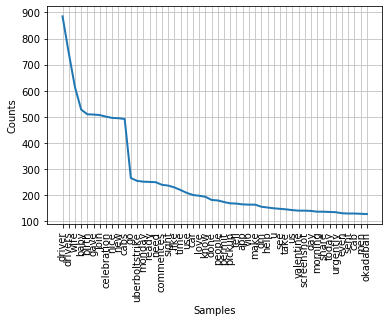

In [24]:
freq_distr_bolt.plot(50, cumulative=False)

In [29]:
freq_distr_plentywaka = FreqDist(plentywaka_dict)

print(freq_distr_plentywaka.most_common(50))

[('bus', 806), ('app', 696), ('like', 664), ('routes', 659), ('ban', 650), ('yesterday', 647), ('something', 646), ('ac', 646), ('specific', 646), ('heard', 646), ('taught', 645), ('waka', 119), ('plenty', 99), ('coaster', 44), ('first', 39), ('stop', 36), ('new', 34), ('buses', 33), ('plentywaka', 32), ('guys', 30), ('live', 27), ('abraham', 27), ('f', 26), ('see', 24), ('route', 24), ('take', 23), ('better', 23), ('time', 23), ('day', 22), ('surprised', 21), ('pull', 21), ('traffic', 21), ('come', 20), ('sponsorship', 20), ('free', 18), ('make', 18), ('book', 18), ('could', 18), ('till', 18), ('use', 17), ('since', 17), ('comfort', 16), ('opportunity', 16), ('adesanya', 16), ('today', 16), ('thank', 16), ('rides', 15), ('morning', 15), ('appreview', 15), ('affected', 15)]


In [30]:
freq_distr_staffbusng = FreqDist(staffbusng_dict)

print(freq_distr_staffbusng.most_common(50))

[('sign', 1684), ('bus', 1677), ('join', 1646), ('admiralty', 1627), ('yaba', 1624), ('rides', 864), ('daily', 861), ('island', 853), ('victoria', 847), ('people', 837), ('need', 833), ('route', 830), ('put', 824), ('guys', 824), ('surulere', 824), ('comfortable', 819), ('tomorrow', 810), ('evening', 809), ('commute', 800), ('weekly', 796), ('fee', 796), ('buses', 791), ('work', 791), ('feeling', 780), ('convenient', 774), ('quick', 774), ('across', 774), ('distraught', 773), ('week', 106), ('ban', 103), ('idea', 63), ('last', 61), ('came', 59), ('brilliant', 58), ('started', 57), ('head', 57), ('domain', 56), ('name', 56), ('okada', 56), ('htt', 55), ('give', 53), ('morning', 51), ('two', 50), ('ajao', 47), ('estate', 47), ('try', 46), ('ready', 45), ('colleagues', 45), ('weeks', 45), ('solid', 45)]


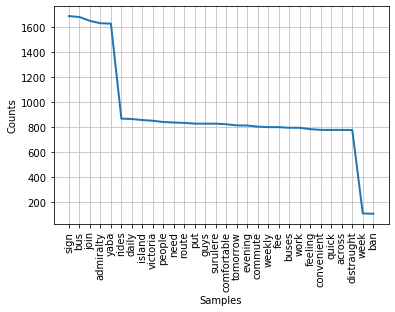

In [138]:
freq_distr_staffbusng.plot(30, cumulative=False)

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

analyzer = SIA()

def sentiment_analyzer(data, column, analyzer):
    sentiment_ = data[column].apply(analyzer.polarity_scores)

    data = pd.concat([data, sentiment_.apply(pd.Series)], 1)
    return data

In [26]:
uber_mentions_03 = sentiment_analyzer(uber_mentions_03, "full_text", analyzer)
uber_mentions_05 = sentiment_analyzer(uber_mentions_05, "full_text", analyzer)
uber_mentions_07 = sentiment_analyzer(uber_mentions_07, "full_text", analyzer)
bolt_mentions_03 = sentiment_analyzer(bolt_mentions_03, "full_text", analyzer)
bolt_mentions_05 = sentiment_analyzer(bolt_mentions_05, "full_text", analyzer)
bolt_mentions_07 = sentiment_analyzer(bolt_mentions_07, "full_text", analyzer)

In [32]:
plentywaka_data_complete = sentiment_analyzer(plentywaka_data_complete, "text", analyzer)

In [33]:
staffbusng = sentiment_analyzer(staffbusng, "full_text", analyzer)

In [27]:
bolt_mentions_03[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.075624,0.755773,0.136572,0.101387
std,0.125419,0.241407,0.186920,0.462950
min,0.000000,0.000000,0.000000,-0.957800
25%,0.000000,0.682000,0.000000,-0.102700
50%,0.000000,0.802000,0.085000,0.000000
75%,0.124000,0.935500,0.179000,0.542300
max,1.000000,1.000000,1.000000,0.988600


In [28]:
bolt_mentions_05[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.075514,0.754937,0.137519,0.103313
std,0.125650,0.241700,0.186913,0.462802
min,0.000000,0.000000,0.000000,-0.957800
25%,0.000000,0.680750,0.000000,-0.077200
50%,0.000000,0.798000,0.087000,0.000000
75%,0.124000,0.935000,0.179000,0.542300
max,1.000000,1.000000,1.000000,0.988600


In [29]:
bolt_mentions_07[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,1585.000000,1585.000000,1585.000000,1585.000000
mean,0.075126,0.742085,0.148681,0.131747
std,0.123970,0.240673,0.190222,0.474879
min,0.000000,0.000000,0.000000,-0.957800
25%,0.000000,0.664000,0.000000,-0.077200
50%,0.000000,0.784000,0.107000,0.025800
75%,0.124000,0.894000,0.190000,0.612400
max,1.000000,1.000000,1.000000,0.988600


In [113]:
plentywaka_data_complete[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.102425,0.778463,0.112589,-0.094275
std,0.073754,0.136779,0.116992,0.328546
min,0.000000,0.000000,0.000000,-0.891000
25%,0.000000,0.766000,0.096000,-0.273200
50%,0.138000,0.766000,0.096000,-0.273200
75%,0.138000,0.792000,0.096000,0.000000
max,0.767000,1.000000,1.000000,0.973200


In [34]:
plentywaka_data_complete.created_at = pd.to_datetime(plentywaka_data_complete.created_at)

In [35]:
plentywaka_data_complete.sort_values("created_at", inplace=True)

In [36]:
staffbusng.created_at = pd.to_datetime(staffbusng.created_at)

In [37]:
staffbusng.sort_values("created_at", inplace=True)

In [32]:
bolt_data = pd.concat([bolt_mentions_03, bolt_mentions_05, bolt_mentions_07], axis=0, ignore_index=True, join="inner")
uber_data = pd.concat([uber_mentions_03, uber_mentions_05, uber_mentions_07], axis=0, ignore_index=True, join="inner")

In [39]:
columns = ['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status']

In [40]:
bolt_data.drop_duplicates(subset=columns, inplace=True)
uber_data.drop_duplicates(subset=columns, inplace=True)

In [45]:
bolt_data.sort_values("created_at", inplace=True)
uber_data.sort_values("created_at", inplace=True)

In [41]:
bolt_data.shape

(4134, 37)

In [42]:
uber_data.shape

(1486, 37)

In [46]:
for dataset in [bolt_data, uber_data]:
    dataset["mean_sentiment"] = dataset["compound"].expanding().mean()

In [38]:
plentywaka_data_complete["mean_sentiment"] = plentywaka_data_complete["compound"].expanding().mean()

In [39]:
staffbusng["mean_sentiment"] = staffbusng["compound"].expanding().mean()

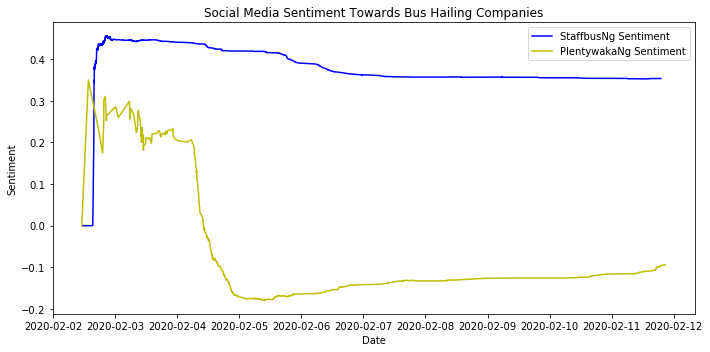

In [41]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#ax.scatter(bolt_mentions_03.created_at, bolt_mentions_03["compound"], label="BoltNg Mentions' Sentiment")
#ax.plot(bolt_data.created_at, bolt_data["mean_sentiment"], color="green", label="Bolt Sentiment")
#ax.plot(uber_data.created_at, uber_data["mean_sentiment"], color="black", label="Uber Sentiment")
ax.plot(staffbusng.created_at, staffbusng["mean_sentiment"], color="blue", label="StaffbusNg Sentiment")
ax.plot(plentywaka_data_complete.created_at, plentywaka_data_complete["mean_sentiment"], color="y", label="PlentywakaNg Sentiment")
ax.set(title="Social Media Sentiment Towards Bus Hailing Companies", xlabel="Date", ylabel="Sentiment")
ax.legend(loc="best")
fig.tight_layout()
plt.show()